## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
#from scipy import stats
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import f_oneway

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

import datetime



In [2]:
# reading Data

flights_train = pd.read_csv(r'data\flights-2018-12-16 to 2019-01-15.csv',sep=',') 
passengers    = pd.read_csv(r'data\passengers.csv',sep=',') 
fuel          = pd.read_csv(r'data\fuel_comsumption.csv',sep=',') 

In [19]:
flights_train.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,651320.000000,651320.000000,651320.000000,651320.000000,651320.000000,644096.000000,644096.000000,643896.000000,643896.000000,643354.000000,...,651320.000000,122308.000000,122308.000000,122308.000000,122308.000000,122308.000000,3999.000000,3998.000000,3999.000000,0.0
mean,2828.827845,2828.908518,12698.272611,12698.134593,1329.079941,1334.536091,9.673237,17.885666,1359.530258,1467.508154,...,783.001293,19.622298,3.157937,14.099969,0.116084,25.576716,1277.210803,34.469735,34.004751,NaN
std,1898.611558,1898.924357,1520.554669,1520.524783,488.509293,499.879539,44.792566,10.025506,500.563985,527.263511,...,591.098106,59.841262,31.584947,30.816364,3.309086,50.395535,514.398565,28.459443,27.333254,NaN
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-60.000000,0.000000,1.000000,1.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,NaN
25%,1171.000000,1171.000000,11292.000000,11292.000000,920.000000,922.000000,-6.000000,12.000000,938.000000,1051.000000,...,347.000000,0.000000,0.000000,0.000000,0.000000,0.000000,820.000000,16.000000,16.000000,NaN
50%,2411.000000,2411.000000,12889.000000,12889.000000,1322.000000,1329.000000,-2.000000,15.000000,1343.000000,1506.000000,...,621.000000,1.000000,0.000000,3.000000,0.000000,4.000000,1233.000000,27.000000,27.000000,NaN
75%,4471.000000,4472.000000,14057.000000,14057.000000,1734.000000,1741.000000,7.000000,21.000000,1756.000000,1910.000000,...,1021.000000,17.000000,0.000000,18.000000,0.000000,31.000000,1721.500000,43.000000,43.000000,NaN
max,9401.000000,9401.000000,16218.000000,16218.000000,2359.000000,2400.000000,1789.000000,181.000000,2400.000000,2400.000000,...,4983.000000,1767.000000,1390.000000,1447.000000,816.000000,1437.000000,2358.000000,297.000000,190.000000,NaN


In [20]:
def missing_value_count(df,drop_over):
    drop_list=[]
    
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = 100*(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_value = pd.concat([missing_number, missing_percent],axis=1 , keys = ['missing_number','missing_percent'])

    drop_list=(missing_value[ missing_value.missing_percent > drop_over] ).index.values.tolist()
    #drop_list=drop_list
    
    return missing_value , drop_list

missing_value_table , column_drop_list = missing_value_count(flights_train,80)

print(column_drop_list)
missing_value_table.head(1000)


['no_name', 'total_add_gtime', 'first_dep_time', 'longest_add_gtime', 'cancellation_code', 'late_aircraft_delay', 'security_delay', 'nas_delay', 'weather_delay', 'carrier_delay']


,missing_number,missing_percent
no_name,651320,100.000000
total_add_gtime,647322,99.386170
first_dep_time,647321,99.386016
longest_add_gtime,647321,99.386016
cancellation_code,643764,98.839894
late_aircraft_delay,529012,81.221519
security_delay,529012,81.221519
nas_delay,529012,81.221519
weather_delay,529012,81.221519
carrier_delay,529012,81.221519


In [21]:
# We keep all columns. 
# Some columns (late_aircraft_delay, security_delay, nas_delay, weather_delay, carrier_delay) 
# are required for future calculations.

#for i in column_drop_list:
 #   flights_train = flights_train.drop( i , axis=1 )
#
#flights_train.head()

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution and that **mean** of the delay is 0. Be careful about the outliers.

(-100.0, 500.0)

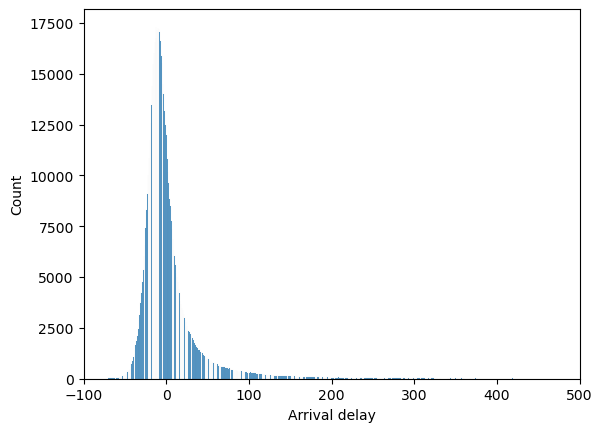

In [22]:
# Distribution for arrival delays before handling outliers
ax = sns.histplot(x=flights_train.arr_delay)
ax.set_xlabel("Arrival delay")
ax.set_xlim(-100,500)

(-100.0, 500.0)

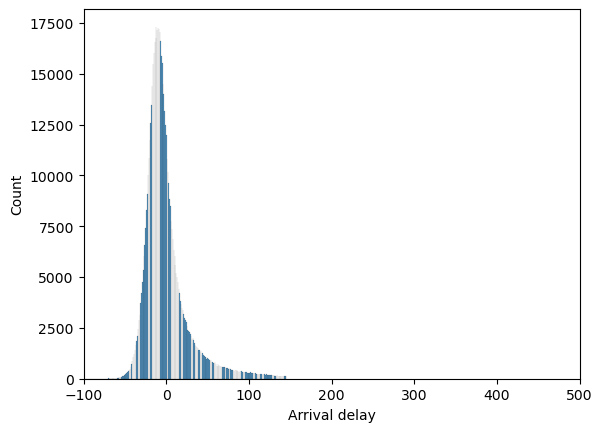

In [23]:
# Distribution for arrival delays after handling outliers

def clip_outliers(df ,List, std_coeff=3 ):
    for c in List:
        if ( ( df[c].dtypes == 'int64' )  |  ( df[c].dtypes == 'float' ) ):
            L=df[c].mean()-std_coeff*df[c].std()
            U=df[c].mean()+std_coeff*df[c].std()
            df[c]=df[c].clip(L, U) #, inplace= True, axis= 1)
    return df

def remove_outliers(df ,List, std_coeff=3 ):
    for c in List:
        if ( ( df[c].dtypes == 'int64' )  |  ( df[c].dtypes == 'float' ) ):
            L=df[c].mean()-std_coeff*df[c].std()
            U=df[c].mean()+std_coeff*df[c].std()
            #df[c]=df[ (df[c] > L) & (df[c] < U) ] #, inplace= True, axis= 1)
            idx=df[ (df[c] >= U) | (df[c] <= L) ].index
            df=df.drop(idx,axis=0)
    return df

flights_train_1=pd.DataFrame(flights_train['arr_delay'],columns = ['arr_delay'])

flights_train_1=remove_outliers(flights_train_1,['arr_delay'], std_coeff=3 )
flights_train_1.describe()


ax = sns.histplot(x=flights_train_1.arr_delay)
ax.set_xlabel("Arrival delay")
ax.set_xlim(-100,500)


In [31]:
arr_delay = flights_train_1['arr_delay']
arr_delay_sample = arr_delay.sample( n= 5000 )
stats.shapiro(arr_delay_sample)

ShapiroResult(statistic=nan, pvalue=1.0)

#### Null hypothesis failed to reject, so the data is normally dist

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
### In this task, online database is used for all flights data

import psycopg2

### Database information
conn = psycopg2.connect(database= "mid_term_project", 
                        user    = "lhl_student", 
                        password= "lhl_student", 
                        host    = "lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com", 
                        port    = "5432")
print("Database opened successfully ")

Database opened successfully 


In [ ]:
# Count number of flights in each month for 2018 and 2019
# Average number of flights and arr_delay calculated for each month on 2018 and 2019
sql_query="""
select 
       substr(fl_date,6, 2) as month,
       count(arr_delay)/2 as number_of_flights      
from flights
where arr_delay is not Null 
group by month
order by month
"""

df_flno = pd.DataFrame(pd.read_sql_query(sql_query,conn) )

df_flno

,month,number_of_flights
0,01,608822
1,02,558550
2,03,659708
3,04,645522
4,05,669458
5,06,672086
6,07,693444
7,08,693542
8,09,637458
9,10,674482


In [ ]:
# Average Sum of arr_delay if arr_delay>0 in each month for 2018 and 2019

sql_query="""
select 
       substr(fl_date,6, 2) as month,
       sum(arr_delay)/2 as sum_arr_delay
from flights
where arr_delay>0 
group by month
order by month
"""
df_arr_delay = pd.DataFrame(pd.read_sql_query(sql_query,conn) )

sql_query="""
select 
       substr(fl_date,6, 2) as month,
       sum(dep_delay)/2 as sum_dep_delay
from flights
where dep_delay>0 
group by month
order by month
"""
df_dep_delay = pd.DataFrame(pd.read_sql_query(sql_query,conn) )

df_arr_delay

,month,sum_arr_delay
0,01,8262493.5
1,02,8672232.5
2,03,7669814.5
3,04,8330071.0
4,05,9852621.5
5,06,11971276.0
6,07,11726648.0
7,08,11631876.0
8,09,7059366.5
9,10,7725924.5


In [ ]:
df_delay=pd.merge(df_arr_delay,df_dep_delay,how='left',on='month')
df_delay=pd.merge(df_delay,df_flno,how='left',on='month')

df_delay['average_arr_delay']=df_delay['sum_arr_delay'] / df_delay['number_of_flights']
df_delay['average_dep_delay']=df_delay['sum_dep_delay'] / df_delay['number_of_flights']

df_delay.sort_values(by='average_arr_delay' , ascending=False , inplace=True)
df_delay

,month,sum_arr_delay,sum_dep_delay,number_of_flights,average_arr_delay,average_dep_delay
5,06,11971276.0,11806606.0,672086,17.812119,17.567106
6,07,11726648.0,11735703.5,693444,16.910735,16.923794
7,08,11631876.0,11433629.0,693542,16.771697,16.485849
1,02,8672232.5,8420504.0,558550,15.526332,15.075649
4,05,9852621.5,9789039.0,669458,14.717311,14.622335
11,12,9157034.0,9174036.5,655605,13.967303,13.993238
0,01,8262493.5,8178380.5,608822,13.571279,13.433122
3,04,8330071.0,8297456.0,645522,12.904395,12.853870
10,11,7615782.5,7471305.0,639188,11.914777,11.688744
2,03,7669814.5,7777220.5,659708,11.626075,11.788883


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [2]:
df = pd.read_csv('flights-2019-01-01 to 2019-01-15.csv')
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-03,AA,AA_CODESHARE,AA,3680,MQ,N248NN,3680,14027,PBI,...,857.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,AA,AA_CODESHARE,AA,3607,MQ,N820AE,3607,15074,SWO,...,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,AA,AA_CODESHARE,AA,5606,OH,N575NN,5606,13577,MYR,...,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,AA,AA_CODESHARE,AA,5621,OH,N720PS,5621,11057,CLT,...,490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,AA,AA_CODESHARE,AA,5621,OH,N720PS,5621,13360,MLB,...,490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311079,2019-01-15,WN,WN,WN,1946,WN,N8580Z,1946,14100,PHL,...,668.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311080,2019-01-15,WN,WN,WN,2308,WN,N906WN,2308,14100,PHL,...,668.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311081,2019-01-15,WN,WN,WN,2223,WN,N8545V,2223,14100,PHL,...,2075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311082,2019-01-15,WN,WN,WN,1019,WN,N7844A,1019,14100,PHL,...,814.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.groupby('origin')['weather_delay'].count().sort_values(ascending=False).head(10)

origin
ORD    3496
SFO    2332
DFW    2198
DEN    1935
LAX    1810
EWR    1512
LGA    1452
ATL    1390
CLT    1360
LAS    1266
Name: weather_delay, dtype: int64

In [4]:
import time
import datetime 
df['fl_date'] = pd.to_datetime(df['fl_date']).dt.strftime('%Y-%m-%d')

In [5]:
df_ORD = df.query('origin == "ORD"').sort_values(by = 'weather_delay',ascending=False)
df_ORD

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
310807,2019-01-14,AA,AA_CODESHARE,AA,4219,MQ,N661JA,4219,13930,ORD,...,130.0,0.0,656.0,0.0,0.0,0.0,2020.0,90.0,67.0,NaN
239902,2019-01-12,UA,UA_CODESHARE,UA,5049,OO,N417SW,5049,13930,ORD,...,157.0,0.0,577.0,13.0,0.0,0.0,NaN,NaN,NaN,NaN
236276,2019-01-12,AA,AA_CODESHARE,AA,4194,MQ,N612AE,4194,13930,ORD,...,268.0,0.0,329.0,44.0,0.0,0.0,1320.0,77.0,77.0,NaN
248128,2019-01-12,UA,UA_CODESHARE,UA,4148,EV,N877AS,4148,13930,ORD,...,475.0,23.0,182.0,23.0,0.0,141.0,NaN,NaN,NaN,NaN
247140,2019-01-12,AA,AA_CODESHARE,AA,2970,OO,N724SK,2970,13930,ORD,...,174.0,0.0,154.0,23.0,0.0,0.0,1312.0,114.0,114.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310910,2019-01-14,UA,UA_CODESHARE,UA,4331,EV,N10575,4331,13930,ORD,...,723.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310927,2019-01-14,UA,UA_CODESHARE,UA,4346,EV,N14977,4346,13930,ORD,...,296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310944,2019-01-14,UA,UA_CODESHARE,UA,4370,EV,N29917,4370,13930,ORD,...,849.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310978,2019-01-14,UA,UA_CODESHARE,UA,4409,EV,N908EV,4409,13930,ORD,...,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_ORD = df_ORD[['fl_date','weather_delay','origin']]
df_ORD

,fl_date,weather_delay,origin
310807,2019-01-14,656.0,ORD
239902,2019-01-12,577.0,ORD
236276,2019-01-12,329.0,ORD
248128,2019-01-12,182.0,ORD
247140,2019-01-12,154.0,ORD
...,...,...,...
310910,2019-01-14,NaN,ORD
310927,2019-01-14,NaN,ORD
310944,2019-01-14,NaN,ORD
310978,2019-01-14,NaN,ORD


In [7]:
import requests
import json
import pandas as pd

api_key = "9d74d51400654e10801202626231802"  
url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"


params = {
    "key": api_key,
    "q": "Chicago City",
    "format": "json",
    "date": "2019-01-01",
    "enddate": "2019-1-15",
}


response = requests.get(url, params=params)
data = json.loads(response.text)

In [8]:
data

{'data': {'request': [{'type': 'City', 'query': 'Chicago, Mexico'}],
  'weather': [{'date': '2019-01-01',
    'astronomy': [{'sunrise': '06:44 AM',
      'sunset': '05:51 PM',
      'moonrise': '02:51 AM',
      'moonset': '02:39 PM',
      'moon_phase': 'Waning Crescent',
      'moon_illumination': '26'}],
    'maxtempC': '29',
    'maxtempF': '83',
    'mintempC': '20',
    'mintempF': '67',
    'avgtempC': '24',
    'avgtempF': '75',
    'totalSnow_cm': '0.0',
    'sunHour': '8.7',
    'uvIndex': '6',
    'hourly': [{'time': '0',
      'tempC': '23',
      'tempF': '73',
      'windspeedMiles': '4',
      'windspeedKmph': '6',
      'winddirDegree': '138',
      'winddir16Point': 'SE',
      'weatherCode': '113',
      'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0008_clear_sky_night.png'}],
      'weatherDesc': [{'value': 'Clear'}],
      'precipMM': '0.0',
      'precipInches': '0.0',
      'humidity': '94',
      'visibility': 

In [9]:
weather_mapping = {
    'Clear': 'Sunny',
    'Partly cloudy': 'Cloudy',
    'Overcast': 'Cloudy',
    'Mist': 'Rainy',
    'Patchy rain possible': 'Rainy',
    'Moderate or heavy rain shower' : 'Rainy',
    'Moderate rain at times' : 'Rainy',
    'Heavy rain at times' : 'Rainy',
    'Light rain': 'Rainy',
    'Moderate rain': 'Rainy',
    'Heavy rain': 'Rainy',
    'Patchy snow possible': 'Snow',
    'Light snow': 'Snow',
    'Moderate snow': 'Snow',
    'Heavy snow': 'Snow',
    'Freezing fog': 'Snow',
    'Thundery outbreaks possible': 'Rainy',
    'Blizzard': 'Snow'
}


for day in data['data']['weather']:
    for hourly_data in day['hourly']:
        hourly_data['weatherDesc'] = [{'value': weather_mapping.get(desc['value'], desc['value'])} for desc in hourly_data['weatherDesc']]
    dates = []
    times = []
    temp_C = []
    Visibility = []
    weather_list = []
    windspeed = []

    hourly_data['weatherDesc']


    for weather_data in data['data']['weather']:
        date = weather_data['date']
        hourly_data = weather_data['hourly']
        for hour_data in hourly_data:
            temp_c = hour_data['tempC']
            wind = hour_data['windspeedKmph']
            visibility = hour_data['visibility']
            time = hour_data['time']
            weather = hour_data['weatherDesc'][0]['value']
            
            dates.append(date)
            times.append(time)
            temp_C.append(temp_c)
            Visibility.append(visibility)
            windspeed.append(wind)
            weather_list.append(weather)

    df_CHI_weather = pd.DataFrame({
        'Date': dates,
        'Time (24h)': times,
        'Temperature (C)' : temp_C,
        'Visibility (km)' : Visibility,
        'Wind Speed (kmph)' : windspeed,
        'Weather Condition' : weather_list
    })




In [10]:
df_CHI_weather.head(20)

,Date,Time (24h),Temperature (C),Visibility (km),Wind Speed (kmph),Weather Condition
0,2019-01-01,0,23,2,6,Sunny
1,2019-01-01,300,21,2,5,Sunny
2,2019-01-01,600,20,2,2,Cloudy
3,2019-01-01,900,23,10,7,Sunny
4,2019-01-01,1200,27,10,9,Cloudy
5,2019-01-01,1500,29,10,11,Cloudy
6,2019-01-01,1800,25,9,9,Sunny
7,2019-01-01,2100,23,9,7,Cloudy
8,2019-01-02,0,22,9,11,Sunny
9,2019-01-02,300,24,4,14,Cloudy


In [12]:
counts = df_CHI_weather['Weather Condition'].value_counts()

occurred_more_than_two_times = []

if counts.get('Sunny', 0) > 2:
    occurred_more_than_two_times.append('Sunny')

if counts.get('Cloudy', 0) > 2:
    occurred_more_than_two_times.append('Cloudy')

if counts.get('Rainy', 0) > 2:
    occurred_more_than_two_times.append('Rainy')

filtered_df = df_CHI_weather[df_CHI_weather['Weather Condition'].isin(occurred_more_than_two_times)]


new_df = pd.DataFrame({'Date': filtered_df['Date'], 'Weather': filtered_df['Weather Condition']})

new_df = new_df.drop_duplicates()

new_df.head(20)

,Date,Weather
0,2019-01-01,Sunny
2,2019-01-01,Cloudy
8,2019-01-02,Sunny
9,2019-01-02,Cloudy
16,2019-01-03,Sunny
18,2019-01-03,Cloudy
24,2019-01-04,Cloudy
27,2019-01-04,Rainy
32,2019-01-05,Rainy
33,2019-01-05,Cloudy


In [13]:
df_new = pd.merge(df_ORD,new_df, how='left', left_on=['fl_date'], right_on = ['Date'])
df_new.tail(20)

,fl_date,weather_delay,origin,Date,Weather
34495,2019-01-14,NaN,ORD,2019-01-14,Cloudy
34496,2019-01-14,NaN,ORD,2019-01-14,Rainy
34497,2019-01-14,NaN,ORD,2019-01-14,Sunny
34498,2019-01-14,NaN,ORD,2019-01-14,Cloudy
34499,2019-01-14,NaN,ORD,2019-01-14,Rainy
34500,2019-01-14,NaN,ORD,2019-01-14,Sunny
34501,2019-01-14,NaN,ORD,2019-01-14,Cloudy
34502,2019-01-14,NaN,ORD,2019-01-14,Rainy
34503,2019-01-14,NaN,ORD,2019-01-14,Sunny
34504,2019-01-14,NaN,ORD,2019-01-14,Cloudy


In [14]:
df_new = df_new.dropna()
df_new

,fl_date,weather_delay,origin,Date,Weather
0,2019-01-14,656.0,ORD,2019-01-14,Sunny
1,2019-01-14,656.0,ORD,2019-01-14,Cloudy
2,2019-01-14,656.0,ORD,2019-01-14,Rainy
3,2019-01-12,577.0,ORD,2019-01-12,Sunny
4,2019-01-12,577.0,ORD,2019-01-12,Cloudy
...,...,...,...,...,...
7559,2019-01-04,0.0,ORD,2019-01-04,Cloudy
7560,2019-01-04,0.0,ORD,2019-01-04,Rainy
7561,2019-01-14,0.0,ORD,2019-01-14,Sunny
7562,2019-01-14,0.0,ORD,2019-01-14,Cloudy


In [15]:
result = df_new[['Weather','weather_delay']]
result.head(20)

,Weather,weather_delay
0,Sunny,656.0
1,Cloudy,656.0
2,Rainy,656.0
3,Sunny,577.0
4,Cloudy,577.0
5,Sunny,329.0
6,Cloudy,329.0
7,Sunny,182.0
8,Cloudy,182.0
9,Sunny,154.0


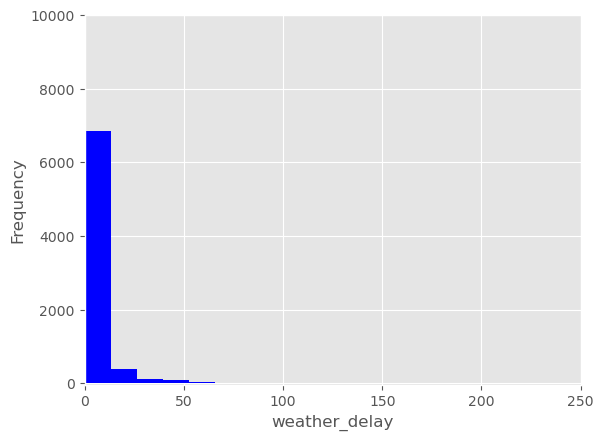

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
bins = 50
plt.hist(result['weather_delay'], bins, color='b')
plt.ylim(-30,10000)
plt.xlim(0,250)
plt.xlabel('weather_delay')
plt.ylabel('Frequency')
plt.show()


In [17]:
result.groupby('Weather').agg(['mean', 'count']).reset_index()

Weather weather_delay      
                   mean count
0  Cloudy      4.328661  3496
1   Rainy      1.927765  1329
2   Sunny      5.199708  2739

In [18]:
import statsmodels.formula.api as smf

model = smf.ols("weather_delay ~ Weather", data=result).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          weather_delay   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     10.69
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           2.30e-05
Time:                        19:45:29   Log-Likelihood:                -33848.
No. Observations:                7564   AIC:                         6.770e+04
Df Residuals:                    7561   BIC:                         6.772e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3287      0.359  

In [19]:
from scipy.stats import ks_2samp

Cloudy = result[result['Weather'] == 'Cloudy']
Rainy = result[result['Weather'] == 'Rainy']
Snowy = result[result['Weather'] == 'Snowy']
Sunny = result[result['Weather'] == 'Sunny']

def hypothesis(p):
    if p < 0.05:
        print("Null hypothesis rejected --> From different distributions", '\n')
    else:
        print("Fail to reject null hypothesis --> From same distribution", '\n')

s1, p1 = ks_2samp(Cloudy['weather_delay'], Rainy['weather_delay'])
s3, p2 = ks_2samp(Cloudy['weather_delay'], Sunny['weather_delay'])
s5, p3 = ks_2samp(Rainy['weather_delay'], Sunny['weather_delay'])


print('Cloudy vs. Rainy:', ks_2samp(Cloudy['weather_delay'], Rainy['weather_delay']))
hypothesis(p1)
print('Cloudy vs. Sunny:', ks_2samp(Cloudy['weather_delay'], Sunny['weather_delay']))
hypothesis(p2)
print('Rainy vs. Sunny:', ks_2samp(Rainy['weather_delay'], Sunny['weather_delay']))
hypothesis(p3)


Cloudy vs. Rainy: KstestResult(statistic=0.12330613682109878, pvalue=3.227675711442087e-13)
Null hypothesis rejected --> From different distributions 

Cloudy vs. Sunny: KstestResult(statistic=0.033454705027724796, pvalue=0.06242475374480929)
Fail to reject null hypothesis --> From same distribution 

Rainy vs. Sunny: KstestResult(statistic=0.15676084184882358, pvalue=1.1650721511318004e-19)
Null hypothesis rejected --> From different distributions 



#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [32]:

df_taxi_daytime = flights_train[['taxi_out','crs_dep_time']].dropna(axis=0)
df_taxi_daytime['crs_dep_hour'] = (df_taxi_daytime['crs_dep_time'])//100

taxiout_hour    = df_taxi_daytime[['taxi_out','crs_dep_hour']].groupby('crs_dep_hour').agg({'taxi_out':np.mean}).reset_index()   
taxiout_hour    = taxiout_hour.rename(columns={'taxi_out':'avg_taxi_out'})

taxiout_traffic = df_taxi_daytime[['taxi_out','crs_dep_hour']].groupby('crs_dep_hour').agg({'taxi_out':len}).reset_index()   
taxiout_traffic = taxiout_traffic.rename(columns={'taxi_out':'no_of_flights'})

taxiout_info=pd.merge(taxiout_hour,taxiout_traffic,how='left',on='crs_dep_hour')

taxiout_info

,crs_dep_hour,avg_taxi_out,no_of_flights
0,0,15.726680,1533
1,1,13.843206,574
2,2,12.790576,191
3,3,12.812261,261
4,4,11.495098,204
5,5,17.796990,16812
6,6,18.603509,45030
7,7,18.985225,42097
8,8,20.268502,41806
9,9,19.129651,38133


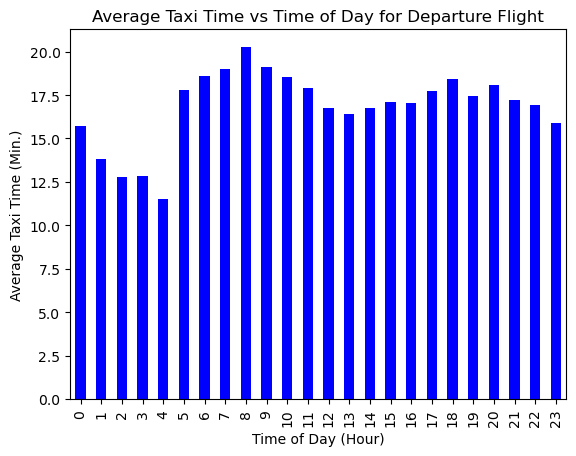

In [33]:
p1 = taxiout_info[['crs_dep_hour','avg_taxi_out']].plot.bar(x='crs_dep_hour',color='blue')
p1.set_xlabel('Time of Day (Hour)')
p1.set_ylabel('Average Taxi Time (Min.)')
p1.set_title('Average Taxi Time vs Time of Day for Departure Flight')
p1.legend('', frameon=False)

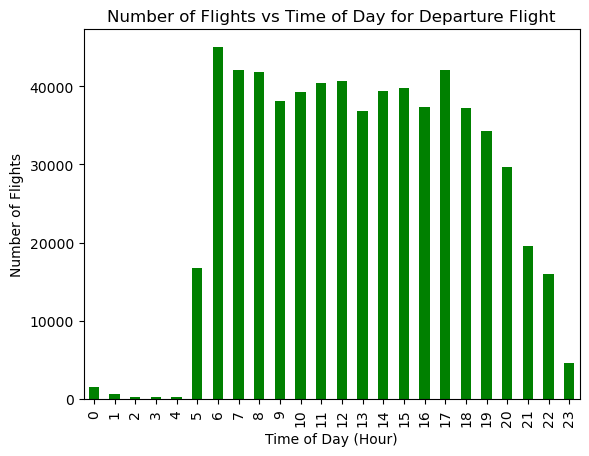

In [34]:
p1 = taxiout_info[['crs_dep_hour','no_of_flights']].plot.bar(x='crs_dep_hour',color='green')
p1.set_xlabel('Time of Day (Hour)')
p1.set_ylabel('Number of Flights')
p1.set_title('Number of Flights vs Time of Day for Departure Flight')
p1.legend('', frameon=False)

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?


Number of arrival delaied flight          =  630184
Number of delays created before departure =  201259
Percen of delays created before departure =  31.94 


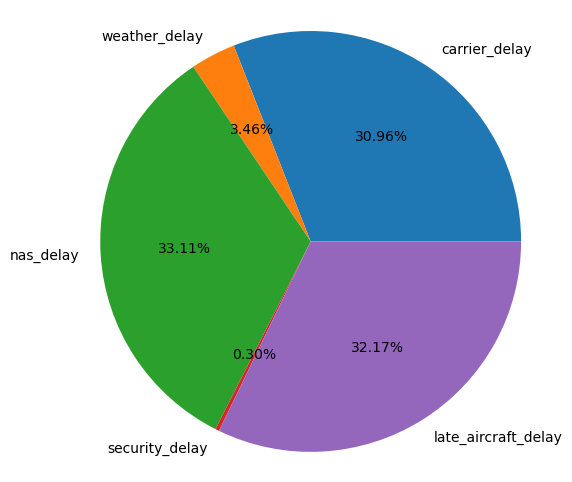

In [35]:
arr_delay_count = flights_train[flights_train['arr_delay']!=0]['arr_delay'].count()
print('Number of arrival delaied flight          = ',arr_delay_count)

#Count different types of delays that are already created before departure.
delay_type = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']
n=len(delay_type)
delay_type_count = n*[0]

for i in range(0,n):
    delay_type_count[i] += ( flights_train[ flights_train[delay_type[i]] >0 ]['arr_delay'].count() )
    
print('Number of delays created before departure = ',sum(delay_type_count))
print('Percen of delays created before departure =  %.2f ' % (100*sum(delay_type_count)/arr_delay_count))

# Percent of different types of delays created before departure
delay_label   = delay_type
delay_percent = delay_type_count
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(delay_percent, labels=delay_label, autopct='%1.2f%%')
ax.axis('equal')
plt.show()

#### **Task 6**: How many states cover 50% of US air traffic? 

In [ ]:
df_state=flights_train[['origin_city_name','dest_city_name']]

df_state['origin_state'] = df_state['origin_city_name'].str[-2:]
df_state['dest_state']   = df_state['dest_city_name'].str[-2:]
df_state.drop(columns=['origin_city_name','dest_city_name'],inplace=True)

df_state.head()

df_state = df_state[['origin_state','dest_state']].groupby('origin_state').nunique()
df_state = 100*df_state / df_state['dest_state'].count()
df_state = df_state.rename(columns={'dest_state':'percent'}).reset_index()
df_state.sort_values('percent',ascending=False , inplace=True )

print("Number of states cover 50% of US air traffic: ",df_state['percent'][ df_state['percent'] > 50].count())

df_state

Number of states cover 50% of US air traffic:  20


,origin_state,percent
13,IL,98.113208
9,GA,94.339623
44,TX,88.679245
8,FL,84.905660
5,CO,84.905660
26,NC,81.132075
22,MN,81.132075
7,DC,79.245283
32,NV,77.358491
33,NY,77.358491


In [ ]:

non_us = [
    'Ontario, CA',
    'British Columbia, CA',
    'Alberta, CA',
    'Saskatchewan, CA',
    'Manitoba, CA',
    'Quebec, CA',
    'Nova Scotia, CA',
    'New Brunswick, CA',
    'Newfoundland, CA',
    'Prince Edward Island, CA',  
     ]

a=pd.DataFrame(flights_train['origin_city_name']).rename(columns={'origin_city_name':'state'})
b=pd.DataFrame(flights_train['dest_city_name'  ]).rename(columns={'dest_city_name'  :'state'})

df_state=a.append(b)
total_traffic,a = df_state.shape

df_state = df_state[~df_state['state'].isin(non_us)]
df_state['state'] = df_state['state'].str[-2:]
df_state['percent'] = 0.0
 
df_state.head()

df_state = df_state[['state','percent']].groupby('state').count()
df_state['percent'] = 100*df_state['percent'] / total_traffic
df_state = df_state.reset_index()
df_state.sort_values('percent',ascending=False , inplace=True )

df_state['accumulation']=df_state['percent'].cumsum()

df_state.head(60)

,state,percent,accumulation
4,CA,10.891190,10.891190
44,TX,9.934748,20.825938
8,FL,8.085196,28.911134
13,IL,6.231115,35.142250
9,GA,5.117070,40.259320
33,NY,5.027406,45.286725
26,NC,4.587069,49.873795
5,CO,4.028204,53.901999
37,PA,2.883222,56.785221
7,DC,2.846527,59.631748


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [39]:
# Calculation of average speed ( v = d / t ) 

delay_type = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

df_speed=flights_train[['distance','air_time']+delay_type]
df_speed= df_speed.dropna( subset=['air_time'])
df_speed['avg_speed'] = df_speed['distance']/ ( df_speed['air_time'] / 60)
df_speed_sample = df_speed.sample( n= 5000 )

for i in delay_type:
    df_speed_sample['delayed'] = np.where( df_speed_sample[i] > 0 , 1 , 0)

avg_speed_delay   = df_speed_sample[ df_speed_sample['delayed']==1]['avg_speed']
avg_speed_nodelay = df_speed_sample[ df_speed_sample['delayed']==0]['avg_speed']

stats.f_oneway(avg_speed_delay , avg_speed_nodelay)

F_onewayResult(statistic=12.956030560830646, pvalue=0.00032198349576344475)

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
longest_flight_time=flights_train['actual_elapsed_time'].loc[~flights_train['actual_elapsed_time'].isna()].max()
print('Longest flight time : %.2f hr' % (longest_flight_time/60))

Longest flight time : 11.90 hr


In [ ]:
# Define 'SHORT', 'MEDIUM' and 'LONG' haul flights
# 'SHORT' :         actual_elapsed_time <= 4 hr
# 'MEDIUM':  4 hr < actual_elapsed_time <=8
# 'LONG'  :  8 hr < actual_elapsed_time
ft_bin= [-1, 240        , 480         , 5000]
ft_lbl= ['','short_haul','medium_haul','long_haul'] 

df_fh=flights_train[['actual_elapsed_time','dep_time']].loc[~flights_train['actual_elapsed_time'].isna()]
df_fh['dep_hour'] = (  df_fh['dep_time'] % 2400 )//100

for ft in range(1,4):
    df_fh[ft_lbl[ft] ] = np.where(((df_fh['actual_elapsed_time'] > ft_bin[ft-1]) & 
                                             (df_fh['actual_elapsed_time'] <= ft_bin[ft])), 1, 0)

df_fh = df_fh[['dep_hour', 'short_haul','medium_haul','long_haul']].groupby(['dep_hour']).sum().reset_index()

df_fh.head(50)

,dep_hour,short_haul,medium_haul,long_haul
0,0.0,2078,618,0
1,1.0,792,179,1
2,2.0,261,60,0
3,3.0,191,71,0
4,4.0,1647,100,0
5,5.0,24326,909,0
6,6.0,36011,4016,0
7,7.0,33181,4813,1
8,8.0,34800,4950,43
9,9.0,33546,3618,108


In [ ]:
colors = {'1':'steelblue',
          '2':'firebrick',
          '3':'green'}

# All flights
fig = go.Figure(data=[
    go.Bar(name= 'Short Haul' , x= df_fh.index , y= df_fh['short_haul' ] , marker_color=colors['1'] ),
    go.Bar(name= 'Medium Haul', x= df_fh.index , y= df_fh['medium_haul'] , marker_color=colors['2'] ),
    go.Bar(name= 'Long Haul'  , x= df_fh.index , y= df_fh['long_haul'  ] , marker_color=colors['3'] )
])

fig.update_layout(barmode='stack',
                  xaxis=dict(
                  title='Hour of Day',
                  tickmode='linear'),
                  yaxis=dict(title='Total Flights'))
fig.show()


# Short flights
data = go.Bar(name='Short Haul',x=df_fh.index, y=df_fh['short_haul'], marker_color=colors['1'] ),

layout = go.Layout(
    title= 'Short Haul flights by Hour',
    xaxis=dict(
    title='Hour of Day',
    tickmode='linear'),
    yaxis=dict(title='Total Flights')    
)

fig = go.Figure(data=data, layout=layout)
fig.show()


# Medium
data = go.Bar(name='Medium Haul',x=df_fh.index, y=df_fh['medium_haul'], marker_color=colors['2']),

layout = go.Layout(
    title= 'Medium Haul flights by Hour',
    xaxis=dict(
    title='Hour of Day',
    tickmode='linear'),
    yaxis=dict(title='Total Flights')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

# Long
data = go.Bar(name='Long Haul',x=df_fh.index, y=df_fh['long_haul'], marker_color=colors['3']),

layout = go.Layout(
    title= 'Long Haul flights by Hour',
    xaxis=dict(
    title='Hour of Day',
    tickmode='linear'),
    yaxis=dict(title='Total Flights')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [ ]:
# Selecting columns
df=passengers[['origin','origin_airport_id','dest','dest_airport_id','passengers']]

# Origin airport and number of flights
df_origin_f=df.groupby(['origin','origin_airport_id']).agg({'origin_airport_id': np.count_nonzero}).rename(columns={'origin_airport_id':'origin_flights_no'   }).reset_index()
df_origin_f.rename(columns = {'origin':'airport_id'}, inplace = True)
df_origin_f.drop('origin_airport_id', inplace=True, axis=1)

# Origin airport and number of passengers
df_origin_p=df.groupby(['origin','origin_airport_id']).agg({'passengers'       : np.sum          }).rename(columns={'passengers'       :'origin_passengers_no'}).reset_index()
df_origin_p.rename(columns = {'origin':'airport_id'}, inplace = True)
df_origin_p.drop('origin_airport_id', inplace=True, axis=1)

# Destination airport and number of flights
df_dest_f=df.groupby(['dest','dest_airport_id']).agg({'dest_airport_id': np.count_nonzero}).rename(columns={'dest_airport_id':'dest_flights_no'   }).reset_index()
df_dest_f.rename(columns = {'dest':'airport_id'}, inplace = True)
df_dest_f.drop('dest_airport_id', inplace=True, axis=1)

# Destination airport and number of passengers
df_dest_p=df.groupby(['dest','dest_airport_id']).agg({'passengers'       : np.sum          }).rename(columns={'passengers'       :'dest_passengers_no'}).reset_index()
df_dest_p.rename(columns = {'dest':'airport_id'}, inplace = True)
df_dest_p.drop('dest_airport_id', inplace=True, axis=1)

# Calculate annual average number of flights and passengers for 2015 to 2019
df_origin_f['origin_flights_no'   ]=df_origin_f['origin_flights_no'   ]//5
df_origin_p['origin_passengers_no']=df_origin_p['origin_passengers_no']//5
df_dest_f  ['dest_flights_no'     ]=df_dest_f  ['dest_flights_no'     ]//5
df_dest_p  ['dest_passengers_no'  ]=df_dest_p  ['dest_passengers_no'  ]//5

# The top 10 the bussiest airports
df1=pd.merge(df_origin_f,df_origin_p,how='left',on=['airport_id'])
df2=pd.merge(df_dest_f  ,df_dest_p  ,how='left',on=['airport_id'])
df=pd.merge(df1,df2  ,how='left',on=['airport_id'])

# calculate total flights an passengers
df['flights_no'   ]= df['origin_flights_no'   ]+ df['dest_flights_no'   ]
df['passengers_no']= df['origin_passengers_no']+ df['dest_passengers_no']

# The top 10 bussiest airports 
df_max_flights=df[['airport_id','flights_no']]
df_max_flights.sort_values('flights_no', ascending=False, inplace=True)
df_max_flights=df_max_flights.iloc[0:10,:]

# The top 10 biggest number of passengers 
df_max_passengers=df[['airport_id','passengers_no']]
df_max_passengers.sort_values('passengers_no', ascending=False, inplace=True)
df_max_passengers=df_max_passengers.iloc[0:10,:]


# The top 10 bussiest airports Traffic 
total_flights=df['flights_no'].sum()
df_max_flights['traffic_percent']=df_max_flights['flights_no']*(100/total_flights)
total_traffic=df_max_flights['traffic_percent'].sum()


In [ ]:
colors = {'1':'steelblue',
          '2':'firebrick',
          '3':'green'}

# The top 10 bussiest airports
data = go.Bar(name='The top 10 bussiest airports',
              x=df_max_flights.airport_id, 
              y=df_max_flights.flights_no, 
              marker_color=colors['1'] ),

layout = go.Layout(
    title= 'The top 10 bussiest airports',
    xaxis=dict(
    title='Airport ID',
    tickmode='linear'),
    yaxis=dict(title='Total Flights')    
)

fig = go.Figure(data=data, layout=layout)
fig.show()

# The top 10 biggest number of passengers
data = go.Bar(name='The top 10 biggest number of passengers',
              x=df_max_passengers.airport_id, 
              y=df_max_passengers.passengers_no, 
              marker_color=colors['2'] ),

layout = go.Layout(
    title= 'The top 10 biggest number of passengers',
    xaxis=dict(
    title='Airport ID',
    tickmode='linear'),
    yaxis=dict(title='Total passengers')    
)

fig = go.Figure(data=data, layout=layout)
fig.show()


# Traffic of the top 10 bussiest airports 
data = go.Bar(name='Traffic of the top 10 bussiest airports',
              x=df_max_flights.airport_id, 
              y=df_max_flights.traffic_percent, 
              marker_color=colors['1'] ),

layout = go.Layout(
    title= 'Traffic percentage of the top 10 bussiest airports - Total traffic percentage = %.1f ' % total_traffic  ,
    xaxis=dict(
    title='Airport ID',
    tickmode='linear'),
    yaxis=dict(title='%Traffic')    
)

fig = go.Figure(data=data, layout=layout)
fig.show()

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [3]:
df_flights = flights_train[['fl_date','op_unique_carrier','distance','dep_delay','arr_delay']]

df_flights['year']  = df_flights['fl_date'].str[0:4]
df_flights['month'] = df_flights['fl_date'].str[5:7]

# summation of distance and delay per month
df_flights = df_flights[['op_unique_carrier','year','month','distance','dep_delay','arr_delay']].groupby(['op_unique_carrier','year','month']).sum().reset_index()

# monthly average
df_flights = df_flights[['op_unique_carrier','distance','dep_delay','arr_delay']].groupby(['op_unique_carrier']).mean().reset_index()
df_flights = df_flights.rename(columns={'op_unique_carrier': 'unique_carrier'})
df_flights

,unique_carrier,distance,dep_delay,arr_delay
0,9E,4779999.0,96545.5,6953.0
1,AA,39599389.0,319233.5,125411.0
2,AS,14446369.5,60648.5,14915.0
3,AX,1460259.5,37794.0,25746.0
4,B6,14229719.0,214568.5,133091.5
5,C5,892329.0,60863.0,53761.5
6,CP,2224227.5,55104.0,44312.0
7,DL,34027884.0,151668.0,-231563.5
8,EM,26730.0,115.5,300.5
9,EV,3178903.0,90308.5,66692.5


In [4]:
df_pass = passengers[['unique_carrier','year','month','passengers']]
#sum travellers by month
df_pass = df_pass[df_pass['year'] >= 2018].groupby(['unique_carrier', 'year', 'month']).sum().reset_index()
#average passenger per month
df_pass = df_pass[['unique_carrier','passengers']].groupby('unique_carrier').mean()

df_pass

,passengers
unique_carrier,
02Q,235.545455
04Q,3942.708333
07Q,6026.222222
09Q,100909.600000
0BQ,12.578947
...,...
Z3,596.391304
Z3Q,2436.173913
ZK,2509.333333


In [5]:
#filter by year
df_fuel = fuel[fuel['year'] >=2018]

#average monthly fuels per carrier
df_fuel = df_fuel[['unique_carrier','total_gallons']].groupby('unique_carrier').mean()
#df3 = df3[df3.total_gallons != 0]

df_fuel.head()

,total_gallons
unique_carrier,
09Q,1.443060e+06
0WQ,4.360333e+03
1BQ,9.802453e+04
27Q,0.000000e+00
2HQ,2.895357e+05


In [6]:
#combine dataframes
df_join = df_flights.join(df_pass, on='unique_carrier', how='inner').join(df_fuel, on='unique_carrier', how='inner')

#ignore rows with fuel consumption = 0
df_join = df_join[df_join.total_gallons != 0]
df_join

,unique_carrier,distance,dep_delay,arr_delay,passengers,total_gallons
1,AA,39599389.0,319233.5,125411.0,1.269777e+07,3.055284e+08
2,AS,14446369.5,60648.5,14915.0,2.920384e+06,6.076106e+07
4,B6,14229719.0,214568.5,133091.5,3.545438e+06,7.216545e+07
7,DL,34027884.0,151668.0,-231563.5,1.313163e+07,3.005069e+08
10,F9,5301547.0,69570.0,31867.5,1.776412e+06,2.251769e+07
11,G4,3616059.5,36077.0,25817.0,1.207058e+06,1.621199e+07
13,HA,2616083.5,6855.5,4081.0,9.655270e+05,2.263476e+07
16,NK,8112760.0,52014.5,5480.5,2.658692e+06,3.650923e+07
18,OO,16530321.0,429806.5,258787.0,3.397631e+06,8.337353e+06
21,UA,30953401.0,247246.5,112961.5,9.600462e+06,2.916056e+08


In [7]:
#create a new column gallons per pax per distance
df_join['Fuel Consumption per pax/km'] = df_join['total_gallons']/df_join['passengers']/df_join['distance']
df_join

,unique_carrier,distance,dep_delay,arr_delay,passengers,total_gallons,Fuel Consumption per pax/km
1,AA,39599389.0,319233.5,125411.0,1.269777e+07,3.055284e+08,6.076249e-07
2,AS,14446369.5,60648.5,14915.0,2.920384e+06,6.076106e+07,1.440213e-06
4,B6,14229719.0,214568.5,133091.5,3.545438e+06,7.216545e+07,1.430418e-06
7,DL,34027884.0,151668.0,-231563.5,1.313163e+07,3.005069e+08,6.725133e-07
10,F9,5301547.0,69570.0,31867.5,1.776412e+06,2.251769e+07,2.390989e-06
11,G4,3616059.5,36077.0,25817.0,1.207058e+06,1.621199e+07,3.714263e-06
13,HA,2616083.5,6855.5,4081.0,9.655270e+05,2.263476e+07,8.961069e-06
16,NK,8112760.0,52014.5,5480.5,2.658692e+06,3.650923e+07,1.692646e-06
18,OO,16530321.0,429806.5,258787.0,3.397631e+06,8.337353e+06,1.484468e-07
21,UA,30953401.0,247246.5,112961.5,9.600462e+06,2.916056e+08,9.812853e-07


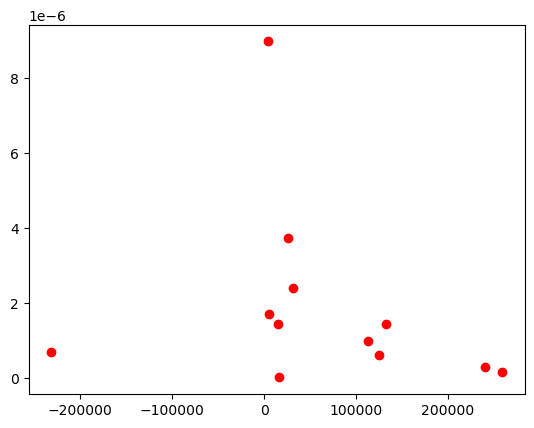

In [11]:
plt.scatter(x = df_join['arr_delay'],
            y = df_join['Fuel Consumption per pax/km'],
            color='red')

# create the layout 
plt.title = 'Fuel Consumption vs Delay by Carrier', 
plt.xaxis = dict(title = 'Average Total Monthly Delay'), 
plt.yaxis = dict(title = 'Fuel Consumption (gallons per pax/km)')

plt.show()